In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('/content/12 concrete.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Train Test Split

In [3]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Check Data Distribution (in project use this code for data distribution)

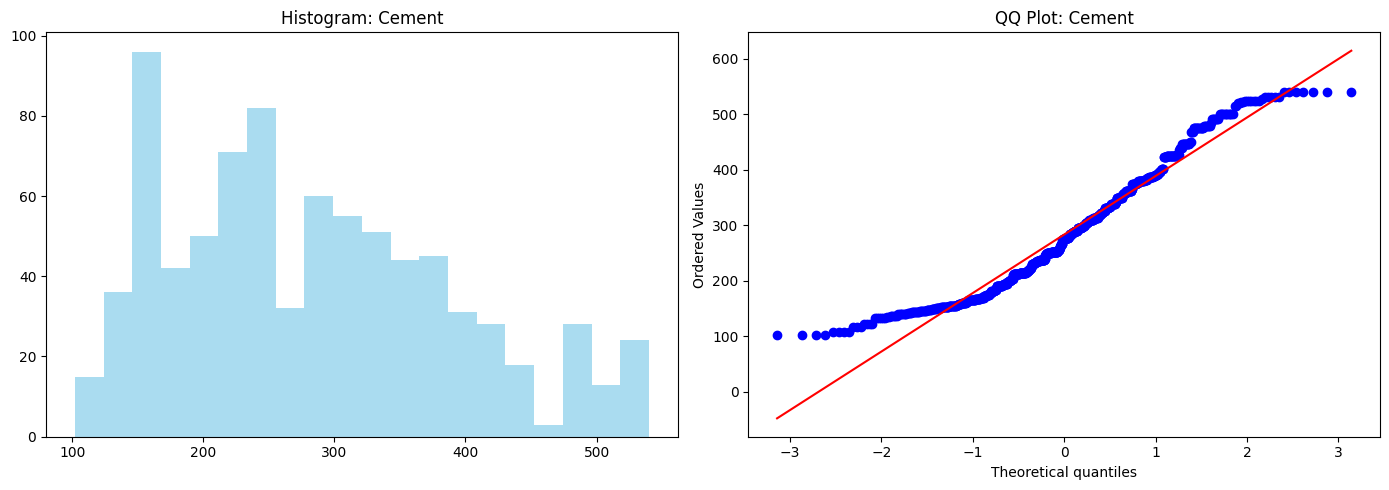

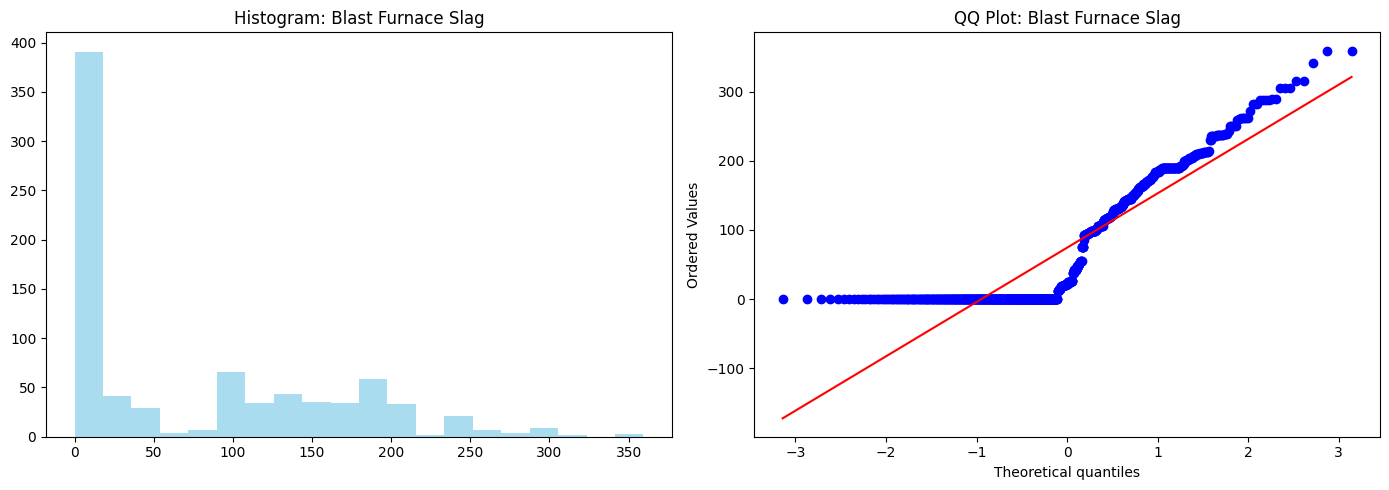

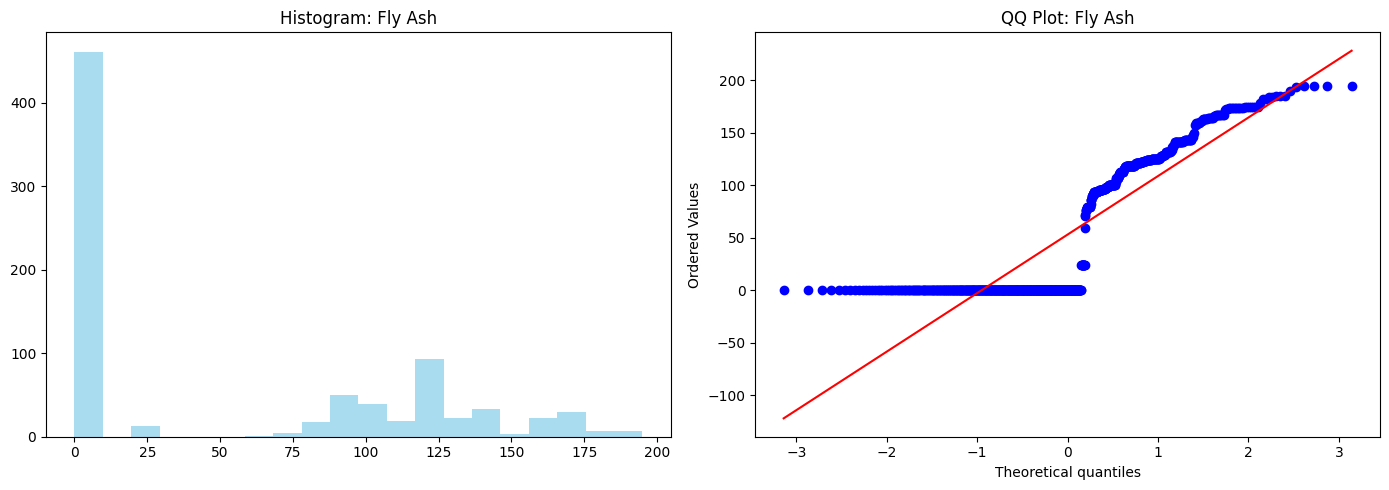

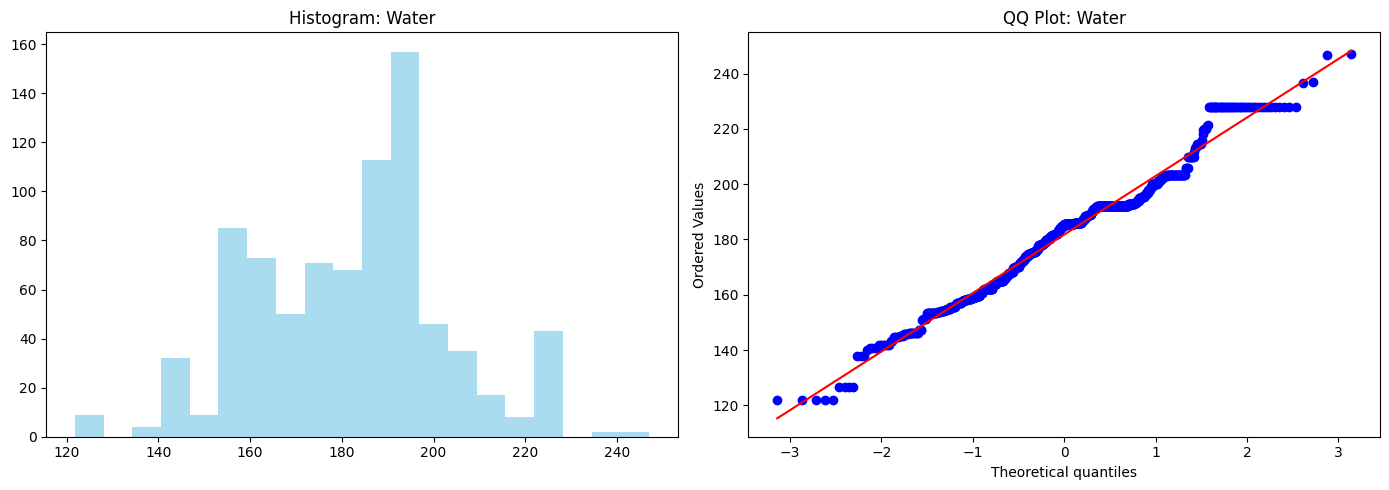

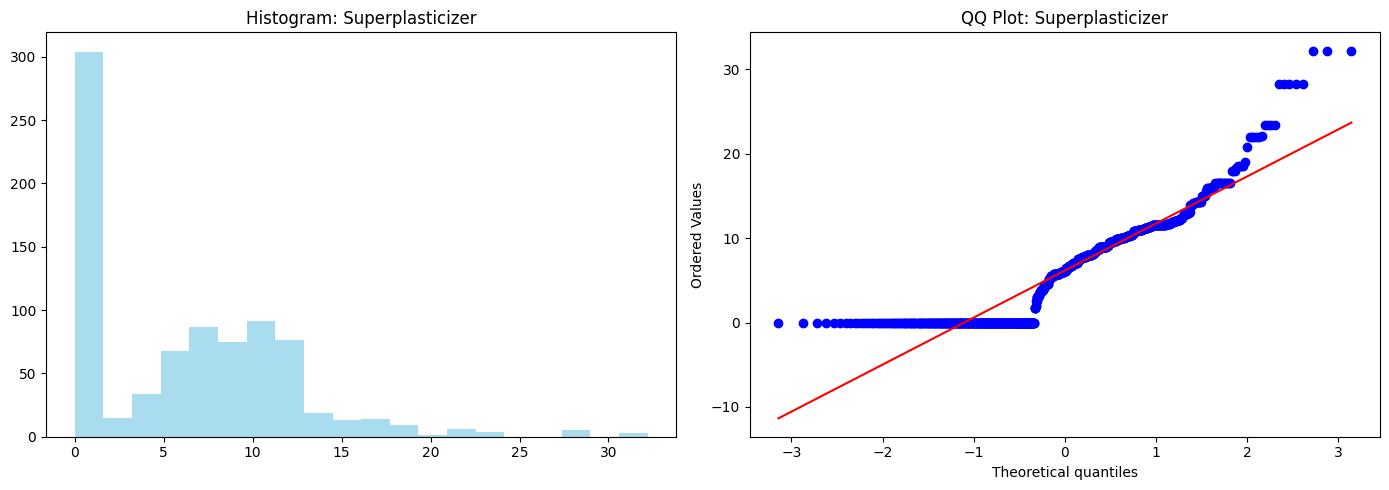

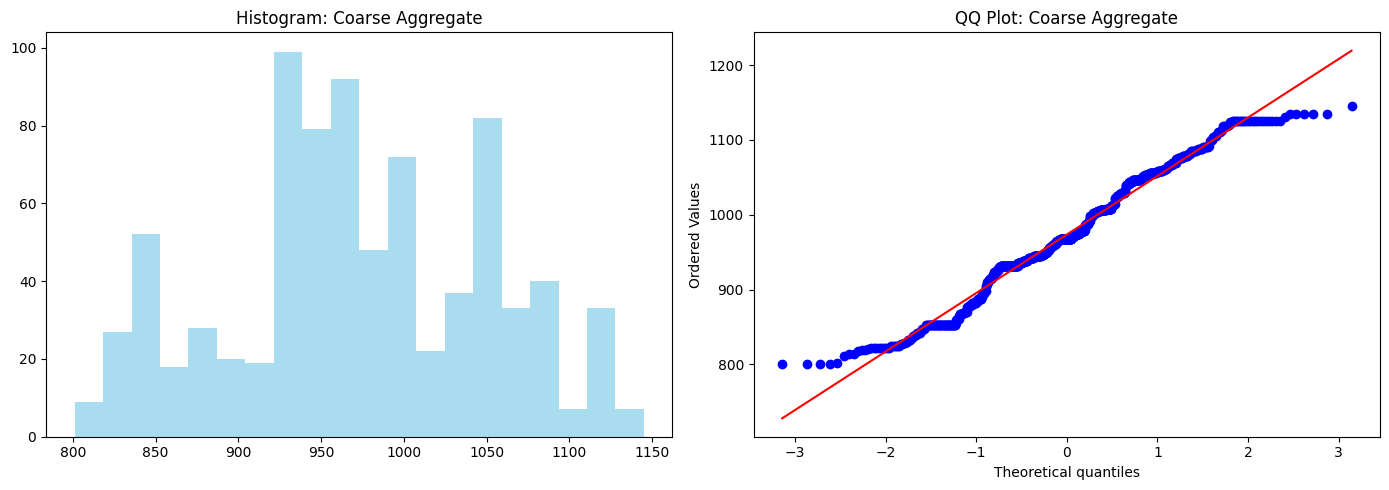

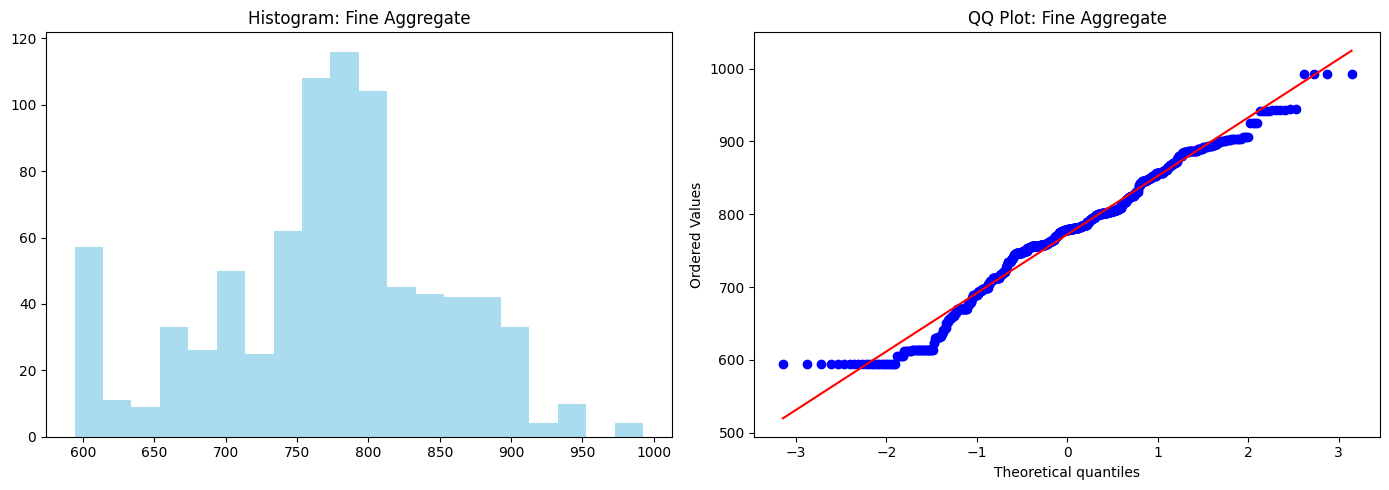

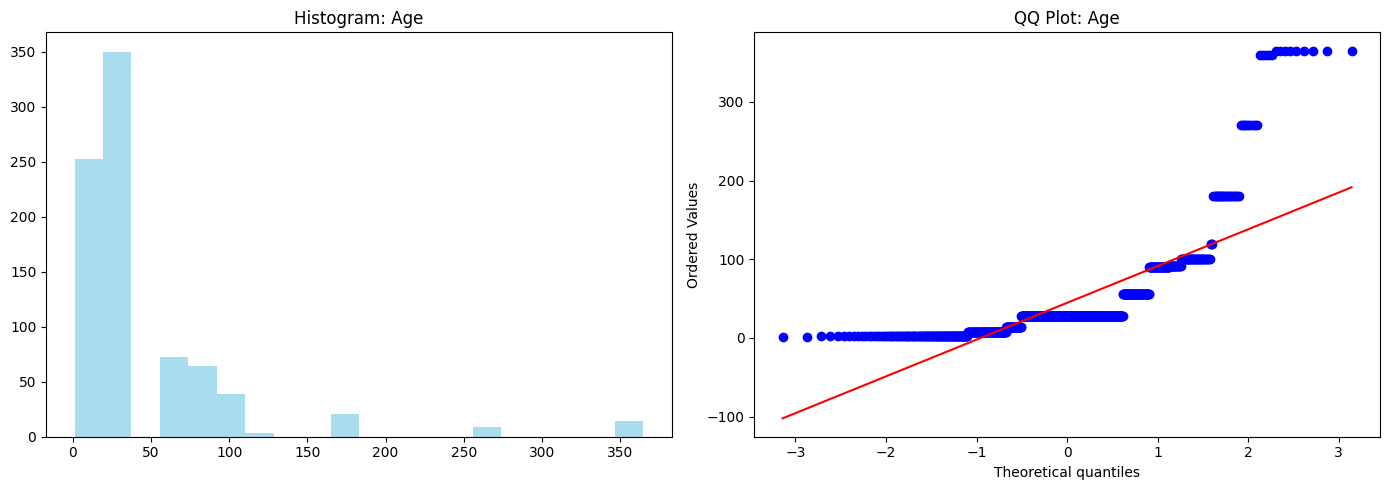

In [4]:
# Plotting the histograms and QQ plots side by side for each column
for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    axes[0].hist(X_train[col], bins=20, color='skyblue', alpha=0.7)
    axes[0].set_title(f'Histogram: {col}')

    # QQ plot
    stats.probplot(X_train[col], dist='norm', plot=axes[1])
    axes[1].set_title(f'QQ Plot: {col}')

    plt.tight_layout()
    plt.show()

Without powertransformer

In [5]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

Applying Box-Cox Transform

In [6]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)

In [7]:
# Applying linear regression on transformed data
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8054599368808216

Apply Yeo-Johnson transform and linear regression

In [8]:
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))

0.8161906512004999
